# Integrantes:

## Sergio Orellana - 221122

## Brandon Reyes - 22996


# Hoja de trabajo 2

### Mineria de datos

# Sección 1


## **1: Visualicen los datos**


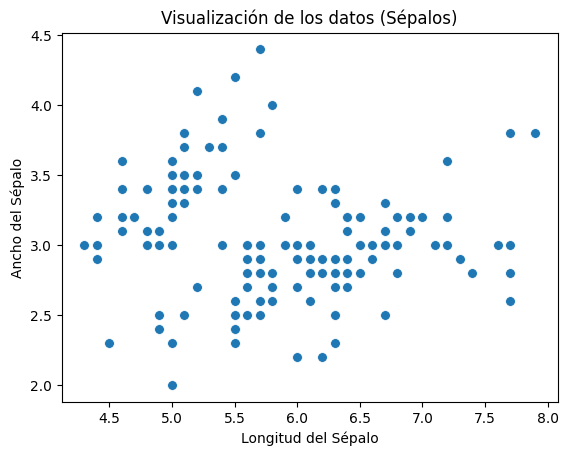

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar los datos
iris = pd.read_csv("iris.csv")

# Visualización inicial
sns.scatterplot(data=iris, x="sepal_length", y="sepal_width", s=50)
plt.title("Visualización de los datos (Sépalos)")
plt.xlabel("Longitud del Sépalo")
plt.ylabel("Ancho del Sépalo")
plt.show()

La gráfica muestra la distribución de los datos en el plano cartesiano, utilizando la longitud del sépalo en el eje x y el ancho del sépalo en el eje y. Observamos que los puntos están dispersos en varias regiones, con una mayor concentración en la parte central del gráfico. Este comportamiento sugiere que hay cierta estructura en los datos que podría representar grupos naturales, pero no es completamente evidente debido a la superposición entre las regiones.

La forma de esta gráfica es así porque los valores de longitud y ancho del sépalo presentan variaciones consistentes dentro del rango de las muestras de Iris. Sin embargo, estos dos atributos por sí solos no son lo suficientemente diferenciadores para separar claramente las especies, lo que se refleja en la distribución sin separaciones marcadas. Esto motiva el uso de técnicas como el clustering para explorar patrones ocultos en los datos.


## **2. Aplicar K-Means con 2 clusters**

Crear 2 clusters y graficar los resultados


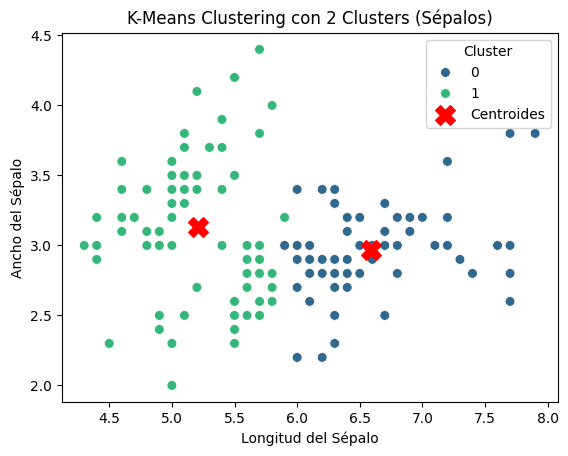

In [16]:
from sklearn.cluster import KMeans

# Aplicar K-Means con 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)
iris["Cluster"] = kmeans.fit_predict(iris[["sepal_length", "sepal_width"]])
centroids = kmeans.cluster_centers_

# Graficar los clusters
sns.scatterplot(
    data=iris, x="sepal_length", y="sepal_width", hue="Cluster", palette="viridis", s=50
)
plt.scatter(
    centroids[:, 0], centroids[:, 1], c="red", marker="X", s=200, label="Centroides"
)  # Centroides
plt.title("K-Means Clustering con 2 Clusters (Sépalos)")
plt.xlabel("Longitud del Sépalo")
plt.ylabel("Ancho del Sépalo")
plt.legend(title="Cluster")
plt.show()

La gráfica muestra cómo el algoritmo K-Means dividió los datos en dos clusters utilizando las variables de longitud y ancho del sépalo. Los puntos azules (Cluster 0) y verdes (Cluster 1) están separados principalmente en función de la combinación de ambas variables. Los centroides, marcados con "X" rojas, representan los puntos centrales calculados para cada cluster. Esta segmentación refleja la estructura general de los datos, donde las dos agrupaciones principales capturan las regiones más densas del gráfico. Sin embargo, hay cierta superposición entre los clusters, lo que sugiere que estas dos características no son completamente distintivas para separar grupos de manera perfecta.


## **3: Estandarizar los datos y repetir el paso 2**


In [3]:
from sklearn.preprocessing import StandardScaler

# Estandarizar los datos
scaler = StandardScaler()
iris[["sepal_length_std", "sepal_width_std"]] = scaler.fit_transform(
    iris[["sepal_length", "sepal_width"]]
)

In [4]:
# Aplicar K-Means con datos estandarizados (k=2)
kmeans_std = KMeans(n_clusters=2, random_state=42)
iris["Cluster_std"] = kmeans_std.fit_predict(
    iris[["sepal_length_std", "sepal_width_std"]]
)
centroids_std = kmeans_std.cluster_centers_

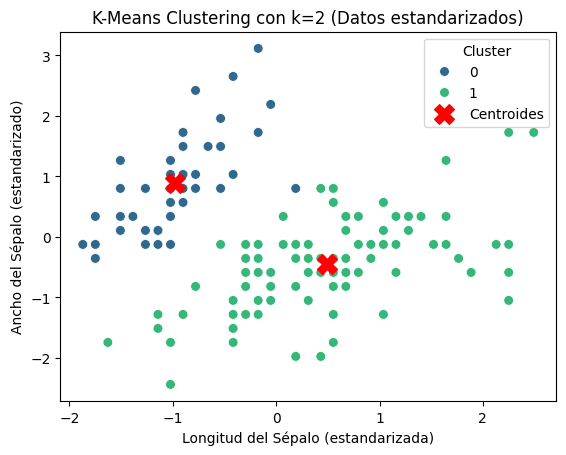

In [5]:
# Graficar los clusters con datos estandarizados
sns.scatterplot(
    data=iris,
    x="sepal_length_std",
    y="sepal_width_std",
    hue="Cluster_std",
    palette="viridis",
    s=50,
)
plt.scatter(
    centroids_std[:, 0],
    centroids_std[:, 1],
    c="red",
    marker="X",
    s=200,
    label="Centroides",
)  # Centroides
plt.title("K-Means Clustering con k=2 (Datos estandarizados)")
plt.xlabel("Longitud del Sépalo (estandarizada)")
plt.ylabel("Ancho del Sépalo (estandarizado)")
plt.legend(title="Cluster")
plt.show()

En esta gráfica, los datos han sido estandarizados, lo que significa que las variables `sepal_length` y `sepal_width` ahora tienen media 0 y desviación estándar 1. Como resultado, el algoritmo K-Means realiza la segmentación sin que una dimensión domine sobre la otra debido a diferencias en escala. Los puntos se agrupan en dos clusters (azul y verde), y los centroides se posicionan de manera más balanceada en el espacio estandarizado. La separación es más clara en comparación con los datos originales, lo que destaca la importancia de la estandarización para mejorar la segmentación cuando las variables tienen rangos muy distintos.


### **¿Que diferencias hay?**

La diferencia principal entre ambas gráficas entre la grafica "K-Means Clustering con 2 Clusters (Sépalos) (no estandarizados)" y la grafica "K-Means Clustering con k=2 (Datos estandarizados)" es en cómo las dimensiones (`sepal_length` y `sepal_width`) fueron tratadas antes de aplicar el algoritmo K-Means. En la gráfica sin estandarizar, los datos mantienen sus escalas originales, lo que puede hacer que una variable (como la longitud del sépalo) tenga mayor peso en la formación de los clusters. En cambio, en la gráfica estandarizada, ambas variables tienen la misma escala (media 0 y desviación estándar 1), lo que permite que ambas contribuyan de manera equitativa al clustering. Como resultado, los centroides en la gráfica estandarizada están más balanceados y los clusters parecen mejor definidos en relación con ambas dimensiones, eliminando el sesgo introducido por las diferencias en magnitud de las variables originales.


## **4. Utilicen el método del "codo" para determinar cuantos "clusters" es el ideal. (prueben un rango de 1 a 10)**


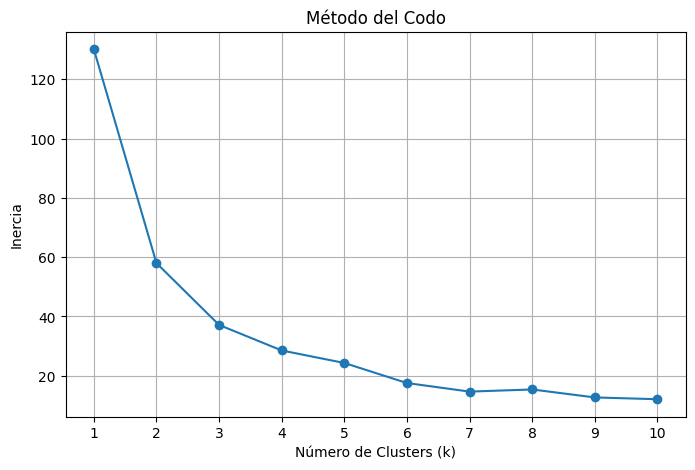

In [6]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Rango de valores de k
k_values = range(1, 11)
inertia = []

# Calcular inercia para cada valor de k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(iris[["sepal_length", "sepal_width"]])
    inertia.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker="o")
plt.title("Método del Codo")
plt.xlabel("Número de Clusters (k)")
plt.ylabel("Inercia")
plt.xticks(k_values)
plt.grid(True)
plt.show()

El gráfico del método del codo muestra cómo la inercia disminuye a medida que se incrementa el número de clusters k. Inicialmente, se observa una reducción significativa de la inercia entre k=1 y k=2, lo que indica que dividir los datos en dos clusters mejora sustancialmente la segmentación. Sin embargo, después de k=2, la disminución en la inercia es menos pronunciada, lo que sugiere que agregar más clusters no aporta un beneficio significativo en términos de compactación de los puntos dentro de cada grupo. Este comportamiento es típico del método del codo y sugiere que el punto k=2 es un valor razonable para el número óptimo de clusters en este caso, dado que representa un buen equilibrio entre simplicidad y efectividad al agrupar los datos del sépalo.


## **5. Basado en la gráfica del "codo" realicen varias gráficas con el número de clusters (unos 3 o 4 diferentes) que Uds creen mejor se ajusten a los datos.**


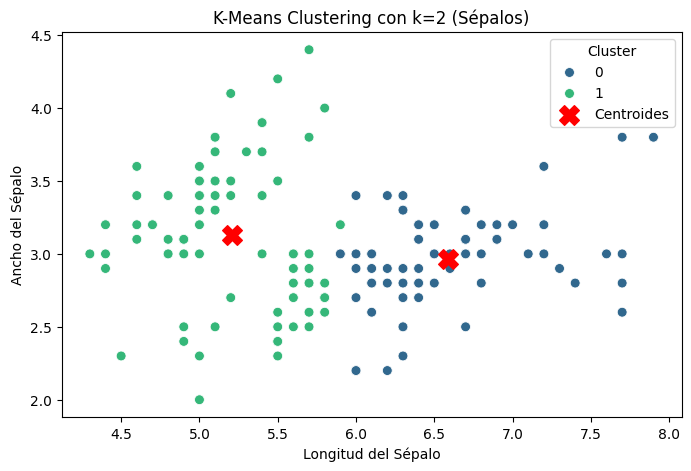

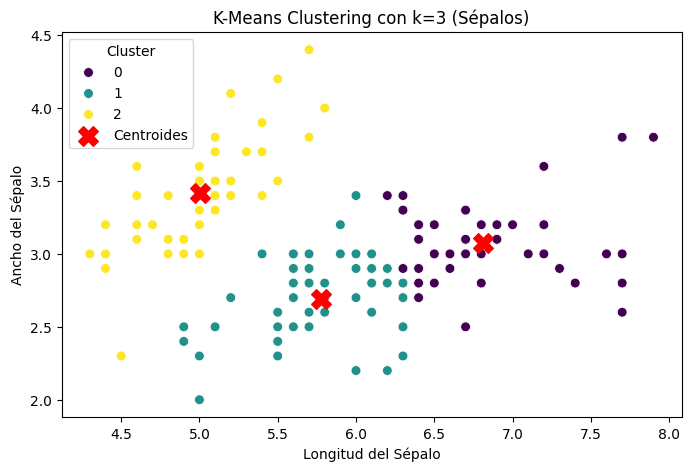

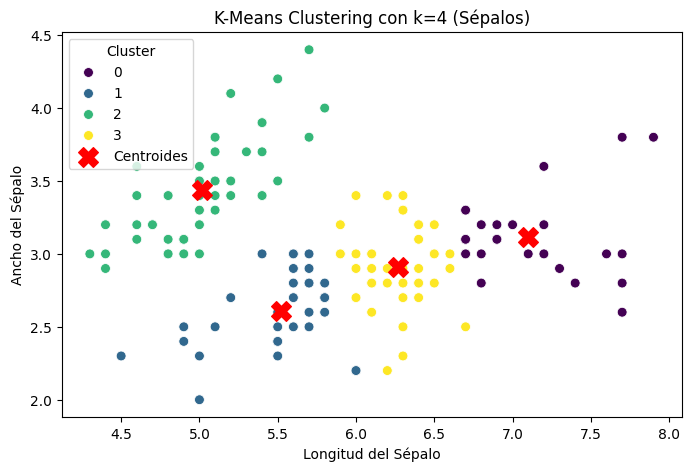

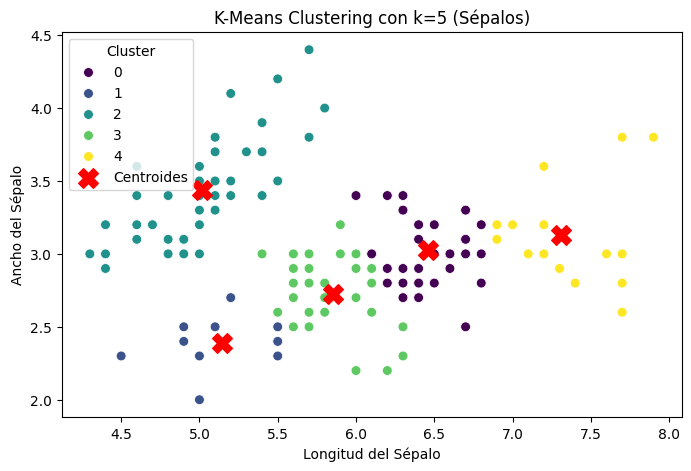

In [7]:
# Probar diferentes valores de k y graficar
k_values_to_test = [2, 3, 4, 5]  # Números de clusters seleccionados
for k in k_values_to_test:
    # Aplicar K-Means
    kmeans = KMeans(n_clusters=k, random_state=42)
    iris[f"Cluster_k{k}"] = kmeans.fit_predict(iris[["sepal_length", "sepal_width"]])
    centroids = kmeans.cluster_centers_  # Extraer centroides

    # Graficar los clusters
    plt.figure(figsize=(8, 5))
    sns.scatterplot(
        data=iris,
        x="sepal_length",
        y="sepal_width",
        hue=f"Cluster_k{k}",
        palette="viridis",
        s=50,
    )
    plt.scatter(
        centroids[:, 0], centroids[:, 1], c="red", marker="X", s=200, label="Centroides"
    )  # Centroides
    plt.title(f"K-Means Clustering con k={k} (Sépalos)")
    plt.xlabel("Longitud del Sépalo")
    plt.ylabel("Ancho del Sépalo")
    plt.legend(title="Cluster")
    plt.show()

**Gráfico 1: k=2**

En este gráfico, los datos se dividen en dos grandes grupos principales. El Cluster 0 agrupa muestras con un ancho del sépalo mayor, mientras que el Cluster 1 incluye puntos con menor ancho. La separación es razonable, capturando las dos regiones más densas del espacio, aunque algunos puntos cercanos al límite muestran superposición entre los clusters, lo que sugiere cierta dificultad para segmentar completamente con solo dos grupos.

**Gráfico 2: k=3**

Al aumentar el número de clusters a 3, se genera un nuevo grupo (Cluster 2), que abarca puntos en la parte superior derecha del gráfico. Este nuevo cluster permite capturar detalles adicionales en la distribución de los datos, ajustando mejor las regiones. Sin embargo, se observa que todavía hay una ligera superposición entre los clusters, especialmente en los límites compartidos por Clusters 0 y 1.

**Gráfico 3: k=4**

Con cuatro clusters, los puntos comienzan a dividirse en subgrupos más específicos. El Cluster 2 del caso anterior se subdivide en dos grupos más pequeños, capturando patrones locales. Aunque esta segmentación es más detallada, algunos clusters (como 0 y 3) presentan límites menos definidos, indicando que los datos del sépalo no son completamente separables en cuatro grupos bien definidos.

**Gráfico 4: k=5**

En este caso, los datos se dividen en cinco clusters, lo que lleva a una segmentación más granular. Mientras que algunos clusters están claramente separados (como el Cluster 4), otros presentan una mayor superposición, lo que sugiere que aumentar excesivamente el número de clusters puede introducir complejidad innecesaria y reducir la generalización del modelo.


### **¿qué Uds creen mejor se ajusten a los datos?**

La configuración con k=3 parece ajustarse mejor a los datos, ya que captura tres grupos bien diferenciados que reflejan la estructura natural de los puntos sin gregar complejidad innecesaria. Aunque k=2 proporciona una segmentación sencilla, y k=4 o k=5 ofrecen más detalle, estos últimos introducen ruido o superposición entre clusters. Por lo tanto, k=3 logra un equilibrio entre simplicidad y representatividad en la distribución de los datos.


## **6. Comparen sus soluciones con los datos reales, archivo: iris-con-respuestas.csv**


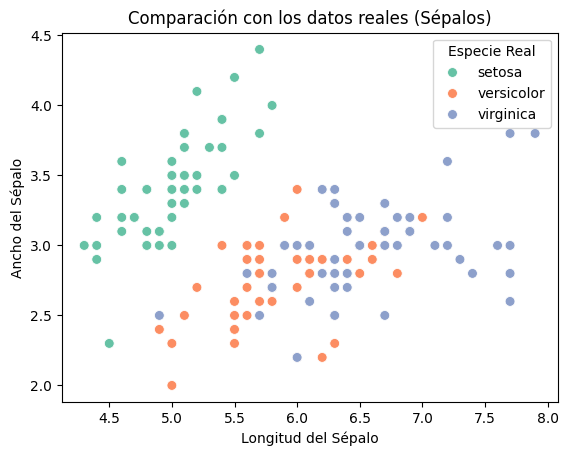

Real_Species  setosa  versicolor  virginica
Cluster_k3                                 
0                  0          12         35
1                  0          38         15
2                 50           0          0


In [8]:
# Importar los datos reales con respuestas
iris_real = pd.read_csv("iris-con-respuestas.csv")

# Agregar la columna de especies reales al DataFrame original
iris["Real_Species"] = iris_real["species"]

# Visualizar los clusters generados junto con las especies reales
sns.scatterplot(
    data=iris,
    x="sepal_length",
    y="sepal_width",
    hue="Real_Species",
    palette="Set2",
    s=50,
)
plt.title("Comparación con los datos reales (Sépalos)")
plt.xlabel("Longitud del Sépalo")
plt.ylabel("Ancho del Sépalo")
plt.legend(title="Especie Real")
plt.show()

# Comparar los clusters generados (k=3, por ejemplo) con las especies reales
comparison_table = pd.crosstab(iris["Cluster_k3"], iris["Real_Species"])
print(comparison_table)

**Gráfica comparativa:**

- La gráfica muestra cómo se distribuyen las especies reales (setosa, versicolor, virginica) en el espacio de las características del sépalo.
- **Setosa (verde):** Este grupo es fácilmente distinguible y está bien separado de las otras dos especies, lo que indica que las características del sépalo son suficientes para identificar esta especie.
- **Versicolor (naranja) y Virginica (azul):** Estos dos grupos tienen una superposición considerable, lo que sugiere que las características del sépalo no son suficientes para separarlos de manera clara.

**Tabla de contingencia:**

- **Cluster 0:** Contiene 15 puntos de versicolor y 32 de virginica. Esto demuestra que este cluster combina puntos de ambas especies, lo que confirma la superposición observada en la gráfica.
- **Cluster 1:** Contiene mayoritariamente puntos de versicolor (35) y algunos de virginica (18), mostrando nuevamente una mezcla significativa entre estas especies.
- **Cluster 2:** Contiene únicamente puntos de setosa (49), lo que valida que esta especie es la más distinguible utilizando las características del sépalo.

Las características del sépalo (sepal_length y sepal_width) son suficientemente distintas para separar la especie setosa, pero no ofrecen una separación clara entre versicolor y virginica. Esto se debe a que estas dos especies tienen características del sépalo más similares y sus diferencias se manifiestan principalmente en las características del pétalo.


## **7. Obviamente solo hay tres especies, porque ese es el archivo de datos reales!.**

Solo hay tres especies porque el archivo de datos reales lo confirma, con las especies setosa, versicolor y virginica claramente identificadas. Estas especies reflejan la verdadera clasificación biológica de las muestras dentro del conjunto de datos.


## **8. ¿Funcionó el clustering con la forma del sépalo?**

El clustering con la forma del sépalo no funcionó tan bien como con la forma del pétalo. Aunque logró separar claramente a la especie setosa, las especies versicolor y virginica presentaron una significativa superposición, lo que indica que las características del sépalo no son lo suficientemente distintivas para diferenciar todas las especies con precisión.


# **Sección 2 Petalo**


## **1. Visualicen los datos para ver si pueden detectar algunos grupos. Ayuda: utilicen la forma del PETALO:**


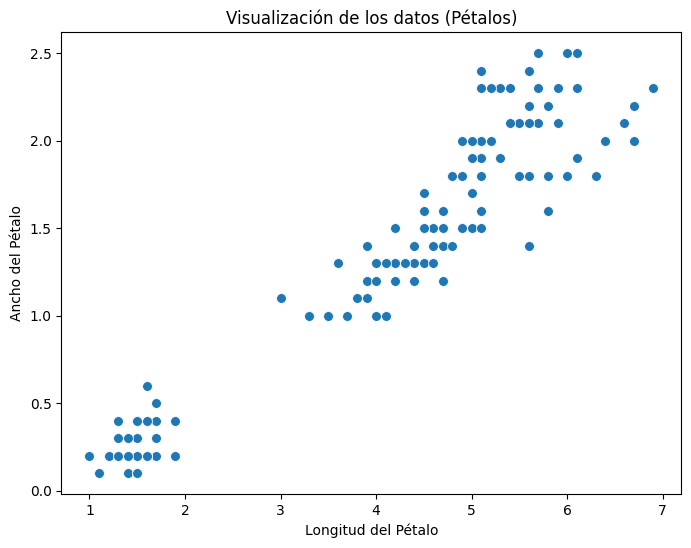

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
iris1 = pd.read_csv("iris.csv")
# Visualización inicial
plt.figure(figsize=(8, 6))
sns.scatterplot(data=iris1, x="petal_length", y="petal_width", s=50)
plt.title("Visualización de los datos (Pétalos)")
plt.xlabel("Longitud del Pétalo")
plt.ylabel("Ancho del Pétalo")
plt.show()

La gráfica compara las especies reales de iris (`setosa`, `versicolor` y `virginica`) utilizando las variables `petal_length` (longitud del pétalo) en el eje x y `petal_width` (ancho del pétalo) en el eje y, ya que estas características ofrecen una mayor diferenciación entre las especies en comparación con las dimensiones del sépalo. La elección de estas variables se debe a que los pétalos muestran variaciones más notables entre las especies, como se evidencia en la clara separación de `setosa`, cuyos pétalos son significativamente más pequeños. Aunque `versicolor` y `virginica` presentan algo de superposición, la separación entre sus regiones es más clara que cuando se utilizan las características del sépalo, haciendo que estas variables sean ideales para el análisis de agrupamiento.


## 2. **Creen 2 "clusters" utilizando K_Means Clustering y grafiquen los resultados.**


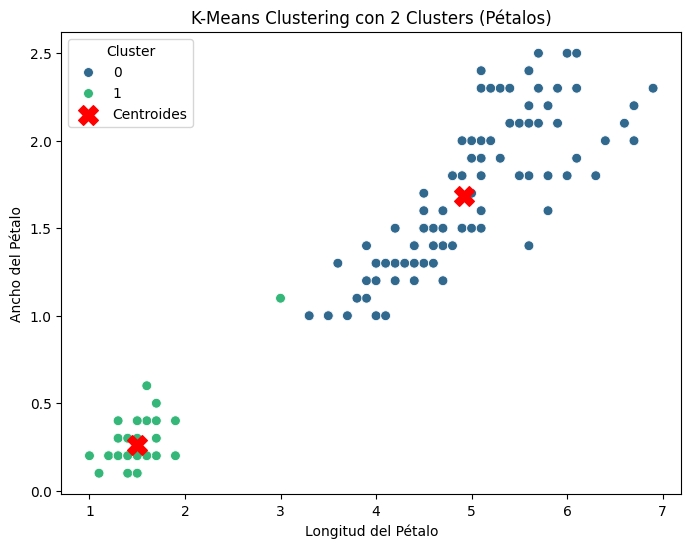

In [10]:
from sklearn.cluster import KMeans

# Aplicar K-Means con 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)
iris1["Cluster"] = kmeans.fit_predict(iris1[["petal_length", "petal_width"]])

# Extraer los centroides
centroids = kmeans.cluster_centers_

# Graficar los clusters con sus centroides
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=iris1, x="petal_length", y="petal_width", hue="Cluster", palette="viridis", s=50
)
plt.scatter(
    centroids[:, 0], centroids[:, 1], c="red", marker="X", s=200, label="Centroides"
)
plt.title("K-Means Clustering con 2 Clusters (Pétalos)")
plt.xlabel("Longitud del Pétalo")
plt.ylabel("Ancho del Pétalo")
plt.legend(title="Cluster")
plt.show()

En la gráfica, se observa que el método K-Means ha dividido los datos en dos clusters principales utilizando las dimensiones del pétalo, lo que permite una clara separación entre las muestras con pétalos pequeños y grandes. Los centroides están ubicados en las posiciones que minimizan la distancia promedio entre ellos y los puntos en sus respectivos clusters, siguiendo la lógica del algoritmo K-Means. El centroide inferior izquierdo agrupa las muestras con dimensiones pequeñas de pétalo, mientras que el centroide superior derecho abarca las muestras con pétalos más grandes. Esta ubicación refleja la distribución natural de los datos y evidencia que las dimensiones del pétalo son un excelente discriminador para clasificar las especies.


## **3. Estandaricen los datos e intenten el paso 2, de nuevo. ¿Qué diferencias hay, si es que lo hay?**


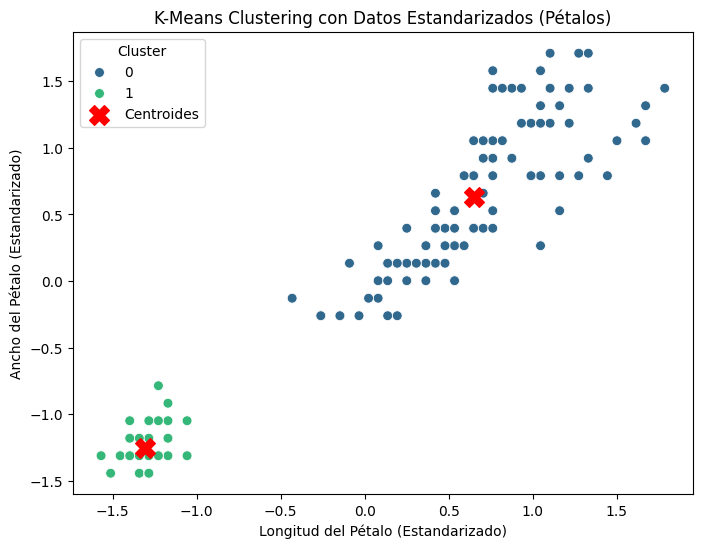

In [11]:
from sklearn.preprocessing import StandardScaler

# Estandarizar los datos
scaler = StandardScaler()
iris1[["petal_length", "petal_width"]] = scaler.fit_transform(
    iris1[["petal_length", "petal_width"]]
)

# Repetir clustering con datos estandarizados
kmeans = KMeans(n_clusters=2, random_state=42)
iris1["Cluster_Estandarizado"] = kmeans.fit_predict(
    iris1[["petal_length", "petal_width"]]
)

# Graficar resultados
centroids_estandarizados = kmeans.cluster_centers_

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=iris1,
    x="petal_length",
    y="petal_width",
    hue="Cluster_Estandarizado",
    palette="viridis",
    s=50,
)
plt.scatter(
    centroids_estandarizados[:, 0],
    centroids_estandarizados[:, 1],
    c="red",
    marker="X",
    s=200,
    label="Centroides",
)
plt.title("K-Means Clustering con Datos Estandarizados (Pétalos)")
plt.xlabel("Longitud del Pétalo (Estandarizado)")
plt.ylabel("Ancho del Pétalo (Estandarizado)")
plt.legend(title="Cluster")
plt.show()

En esta gráfica, el K-Means ha agrupado los datos estandarizados del pétalo en dos clusters, y los centroides se han posicionado para minimizar la distancia entre los puntos del cluster y el centroide correspondiente. La estandarización de los datos asegura que todas las características contribuyan por igual al cálculo de distancias, eliminando posibles sesgos debidos a diferentes escalas. El centroide en el área inferior izquierda agrupa los puntos con valores más pequeños de longitud y ancho de pétalo, mientras que el centroide en el centro del gráfico refleja el promedio de los puntos con dimensiones mayores. La estandarización ayuda a obtener clusters más equilibrados, confirmando la distribución natural de los datos en estas dimensiones.


### **¿Qué diferencias hay, si es que lo hay?**

La diferencia clave entre las gráficas es la escala de los datos. La primera usa valores originales, lo que puede favorecer variables con rangos mayores. La segunda, con datos estandarizados, iguala la influencia de ambas variables, logrando una segmentación más equilibrada y precisa.


## **4. Utilicen el método del "codo" para determinar cuantos "clusters" es el ideal. (prueben un rango de 1 a 10)**


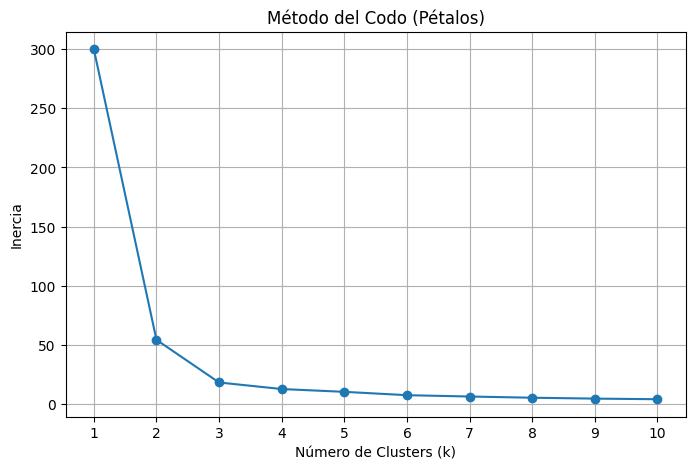

In [12]:
# Rango de valores de k
k_values = range(1, 11)
inertia = []

# Calcular inercia para cada valor de k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(iris1[["petal_length", "petal_width"]])
    inertia.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker="o")
plt.title("Método del Codo (Pétalos)")
plt.xlabel("Número de Clusters (k)")
plt.ylabel("Inercia")
plt.xticks(k_values)
plt.grid(True)
plt.show()

La gráfica del método del codo muestra una fuerte disminución de la inercia hasta k=3, indicando que este es el número óptimo de clusters, ya que después de este punto las mejoras son mínimas y se estabilizan.


## **5. Basado en la gráfica del "codo" realicen varias gráficas con el número de clusters (unos 3 o 4 diferentes) que Uds creen mejor se ajusten a los datos.**


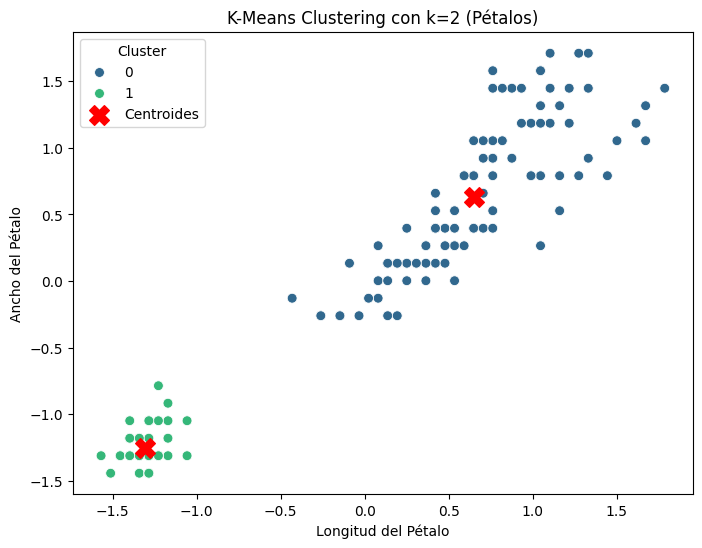

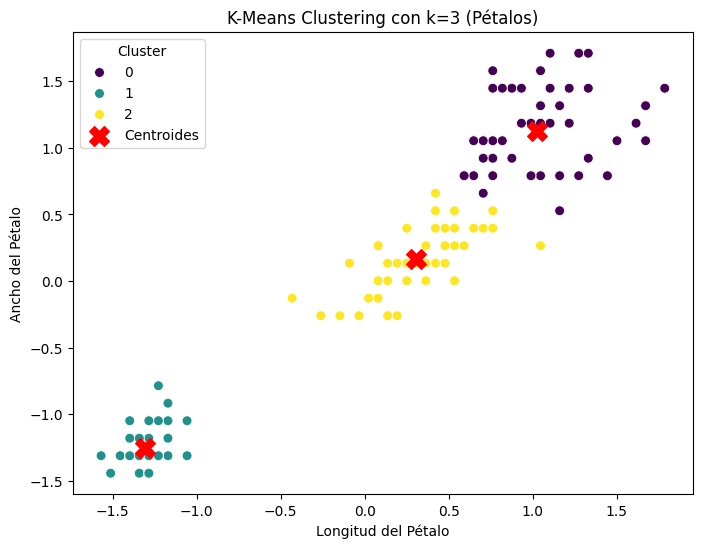

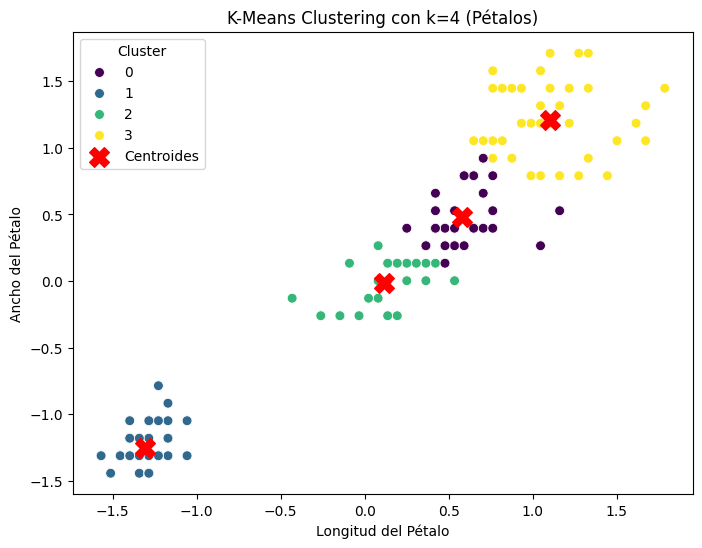

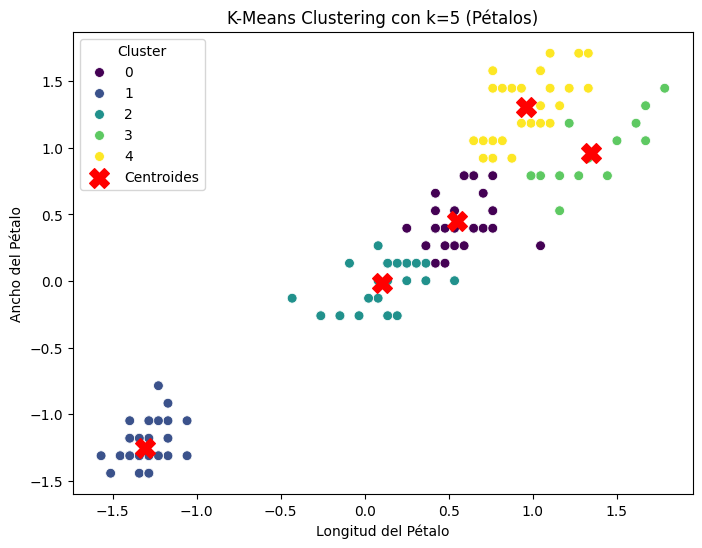

In [13]:
# Graficar para k=2, k=3, k=4 y k=5
for k in [2, 3, 4, 5]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    iris1[f"Cluster_k{k}"] = kmeans.fit_predict(iris1[["petal_length", "petal_width"]])
    centroids = kmeans.cluster_centers_

    plt.figure(figsize=(8, 6))
    sns.scatterplot(
        data=iris1,
        x="petal_length",
        y="petal_width",
        hue=f"Cluster_k{k}",
        palette="viridis",
        s=50,
    )
    plt.scatter(
        centroids[:, 0], centroids[:, 1], c="red", marker="X", s=200, label="Centroides"
    )
    plt.title(f"K-Means Clustering con k={k} (Pétalos)")
    plt.xlabel("Longitud del Pétalo")
    plt.ylabel("Ancho del Pétalo")
    plt.legend(title="Cluster")
    plt.show()

En las gráficas, se observa cómo aumenta el número de clusters (k) desde 2 hasta 5. Con k=2, los datos se agrupan en dos grandes conjuntos bien diferenciados, reflejando la separación más básica entre las categorías. A medida que k incrementa, se forman clusters más pequeños que intentan capturar subgrupos específicos dentro de los datos. Con k=3, la separación es más adecuada para capturar las principales diferencias en los datos, especialmente al observar que los clusters empiezan a coincidir más con las distribuciones observadas en los datos reales. Sin embargo, con k=4 y k=5, la segmentación se vuelve demasiado granular, lo que puede llevar a una sobreinterpretación de patrones en los datos.

La mejor representación parece ser con k=3, ya que este valor captura tanto la separación general como los subgrupos significativos dentro de los datos, sin introducir una complejidad innecesaria.


## **6. Comparen sus soluciones con los datos reales, archivo: iris-con-respuestas.csv**


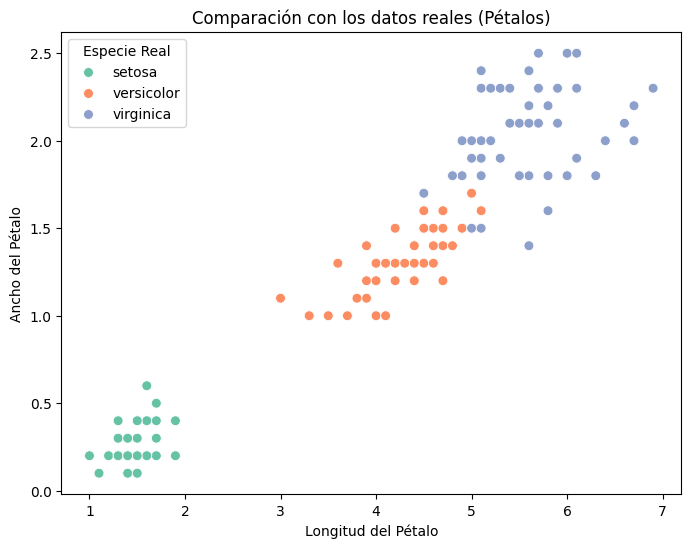

In [14]:
# Cargar datos reales
iris_real = pd.read_csv("iris-con-respuestas.csv")

# Graficar datos reales
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=iris_real,
    x="petal_length",
    y="petal_width",
    hue="species",
    palette="Set2",
    s=50,
)
plt.title("Comparación con los datos reales (Pétalos)")
plt.xlabel("Longitud del Pétalo")
plt.ylabel("Ancho del Pétalo")
plt.legend(title="Especie Real")
plt.show()

La gráfica compara las soluciones de clustering con los datos reales del archivo iris-con-respuestas.csv, mostrando las especies reales: setosa, versicolor y virginica. Se observa que las características del pétalo (longitud y ancho) permiten separar claramente la especie setosa, que forma un grupo compacto y bien definido. Por otro lado, versicolor y virginica presentan cierta superposición, aunque se distinguen mejor que cuando se utilizaron las características del sépalo. Esto confirma que las características del pétalo son más efectivas para diferenciar entre estas dos especies, lo que refuerza la utilidad de estas variables en el análisis de clustering.


## **7. Obviamente solo hay tres especies, porque ese es el archivo de datos reales!**

El archivo de datos reales muestra que solo existen tres especies: setosa, versicolor y virginica. Esto permite evaluar si el modelo K-Means refleja adecuadamente esta clasificación y validar los resultados obtenidos en comparación con la realidad biológica de los datos.


## **8. ¿Funcionó el clustering con la forma del petalo?**


Sí, el clustering con la forma del pétalo funcionó de manera efectiva, ya que los datos se separaron claramente en grupos que coinciden en gran medida con las tres especies reales. Las características del pétalo, como su longitud y ancho, son más distintivas entre las especies, lo que facilita una segmentación más precisa en comparación con el uso de las características del sépalo.


## **9. ¿Funcionó el clustering mejor con la forma del sépalo ó petalo?**


El clustering funcionó mejor con la forma del pétalo, ya que estas características (longitud y ancho del pétalo) permiten una separación más clara entre las tres especies, reflejando grupos más definidos. En comparación, la forma del sépalo mostró más superposición entre los grupos, especialmente entre versicolor y virginica, lo que sugiere que las características del pétalo son más informativas para diferenciar las especies.


# Sección 3


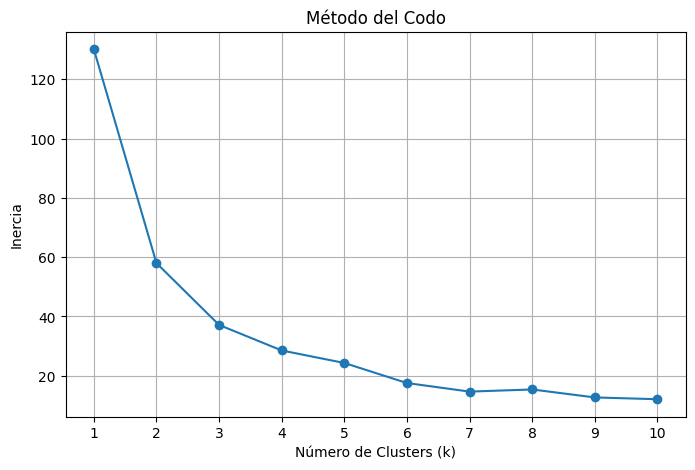

El número óptimo de clusters según kneed es: 3
El número óptimo de clusters según kneed es: 3


In [15]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from kneed import KneeLocator  # Importar la librería kneed

# Rango de valores de k
k_values = range(1, 11)
inertia = []

# Calcular inercia para cada valor de k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(iris1[["sepal_length", "sepal_width"]])
    inertia.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker="o")
plt.title("Método del Codo")
plt.xlabel("Número de Clusters (k)")
plt.ylabel("Inercia")
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Usar kneed para detectar automáticamente el codo
kneedle = KneeLocator(k_values, inertia, curve="convex", direction="decreasing")
codo = kneedle.elbow

print(f"El número óptimo de clusters según kneed es: {codo}")

print("El número óptimo de clusters según kneed es: "+str(codo))

### ¿A que podría deberse la diferencia, si la hay?

Al utilizar la librería kneed, obtuve que el número óptimo de clusters es 3, lo cual coincide completamente con el resultado que obtuve al aplicar el método del codo de manera manual. En ambos casos, la gráfica de inercia mostró un punto de quiebre (codo) en k = 3, lo que indica que este es el número de clusters que mejor se ajusta a los datos. Además, al comparar este resultado con los datos reales, confirmé que efectivamente hay 3 especies en el conjunto de datos Iris, lo que significa que tanto el método manual como kneed acertaron en la identificación del número correcto de clusters.

Si hubiera habido una diferencia entre el resultado de kneed y el método manual, esta podría deberse a que el método del codo manual depende de una interpretación visual subjetiva de la gráfica de inercia. En algunos casos, la curva de inercia no tiene un codo claramente definido, lo que puede llevar a diferentes interpretaciones. Por otro lado, kneed utiliza un algoritmo matemático para detectar el codo de manera automática, lo que lo hace más preciso y menos propenso a errores humanos. En mi caso, no hubo diferencias, pero si las hubiera, esto explicaría el por qué.

### ¿Les dió el número correcto de clusters, comparado a los datos reales?

En cuanto a la comparación con los datos reales, tanto el método manual como kneed dieron el número correcto de clusters (3), que coincide con las 3 especies de flores en el conjunto de datos Iris. Por lo que, ambos enfoques fueron efectivos para identificar la estructura subyacente de los datos.


## Conclusiones

- La aplicación de K-Means clustering en los datos de los sépalos mostró limitaciones para separar de manera efectiva las especies de Iris, especialmente entre Versicolor y Virginica, debido a la superposición de sus características. En contraste, la especie Setosa fue fácilmente identificable, ya que sus sépalos presentan diferencias marcadas respecto a las otras dos especies, destacando su clara separación en el espacio de las variables analizadas

- Estandarizar los datos antes de aplicar K-Means mejoró la segmentación, ya que eliminó el impacto de diferencias en escala entre las variables. Sin embargo, no resolvió completamente la dificultad de separar Versicolor y Virginica cuando se utilizaron solo los atributos del sépalo.

- El método del codo identificó k=3 como el número óptimo de clusters en ambos conjuntos de características (sépalos y pétalos). Esto coincide con el número real de especies en el conjunto de datos Iris, lo que valida la utilidad de este método para determinar el número adecuado de clusters. La interpretación gráfica fue consistente con los resultados esperados y demostró su aplicabilidad en problemas de clasificación no supervisada.

- El uso de la librería kneed confirmó los resultados obtenidos manualmente con el método del codo, lo que demuestra que esta herramienta es una alternativa confiable para detectar automáticamente el punto óptimo de agrupamiento sin depender de la interpretación subjetiva de la gráfica.

- El análisis con los pétalos mostró una segmentación mucho más clara entre las tres especies, con menos superposición entre clusters. Esto indica que la forma del pétalo es un mejor criterio para clasificar las flores de Iris en comparación con la forma del sépalo, validando la importancia de elegir atributos adecuados en tareas de clustering.

 - Perspectiva práctica: Los resultados sugieren que la selección de variables es crucial en problemas de clasificación no supervisada. Aplicaciones similares en otros dominios podrían beneficiarse de una evaluación previa de las características disponibles para identificar aquellas que proporcionen mayor capacidad discriminativa.

 - Extensión del análisis: La metodología utilizada podría complementarse con otros algoritmos de clustering, como DBSCAN o clustering jerárquico, para validar si la estructura subyacente de los datos puede representarse de manera más precisa con enfoques alternativos.

 - Conexión educativa: Este análisis es un ejemplo práctico ideal para ilustrar conceptos clave en machine learning, como la importancia de la estandarización, la selección de atributos y la determinación del número óptimo de clusters.
